In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline
import os
import json
os.environ["PUIDATA"] = "%s//Desktop/PUI/PUIDATA"%os.getenv("HOME")

Populating the interactive namespace from numpy and matplotlib


# IDEA:
## People who have taken short-term passes(customers) tend to ride the bike longer than ones with long-term passes(subscribers)
# NULL HYPOTHESIS:
## The average duration of trips taken by subscribers is _the same_ or _higher_  than the average duration of trips taken by customers
# ALTERNATE HYPOTHESIS:
## The average duration of trips taken by consumers is _higher_  than the average duration of trips taken by subscribers

# _$H_0$_ : ${S_{\mathrm{average}}} >= {C_{\mathrm{average}}}$
# _$H_1$_ : ${C_{\mathrm{average}}} > {S_{\mathrm{average}}}$


## The significance level I will choose is  $\alpha=0.05$. i.e. 95% confidence level.


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    # Check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # iIf yes just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA")) 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

### Using January of 2016 and April of 2015 to incorporate some temporal and seasonal effects

In [4]:
datestring1 = '201601'
getCitiBikeCSV(datestring1)

file in place, you can continue


In [6]:
datestring2 = '201504'
getCitiBikeCSV(datestring2)

file in place, you can continue


In [7]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])

In [10]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,241,4/1/2015 00:00:23,4/1/2015 00:04:25,494,W 26 St & 8 Ave,40.747348,-73.997236,489,10 Ave & W 28 St,40.750664,-74.001768,15510,Subscriber,1992.0,2,2015-04-01 00:00:23
1,578,4/1/2015 00:00:52,4/1/2015 00:10:31,82,St James Pl & Pearl St,40.711174,-74.000165,2008,Little West St & 1 Pl,40.705693,-74.016777,15014,Subscriber,1982.0,1,2015-04-01 00:00:52
2,484,4/1/2015 00:01:28,4/1/2015 00:09:33,223,W 13 St & 7 Ave,40.737815,-73.999947,445,E 10 St & Avenue A,40.727408,-73.981420,20881,Subscriber,1986.0,2,2015-04-01 00:01:28
3,1144,4/1/2015 00:01:31,4/1/2015 00:20:36,393,E 5 St & Avenue C,40.722992,-73.979955,393,E 5 St & Avenue C,40.722992,-73.979955,20295,Subscriber,1977.0,2,2015-04-01 00:01:31
4,1023,4/1/2015 00:01:36,4/1/2015 00:18:40,212,W 16 St & The High Line,40.743349,-74.006818,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19871,Subscriber,1979.0,1,2015-04-01 00:01:36


In [8]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df1['date'] = pd.to_datetime(df1['starttime'])

In [15]:
df = pd.concat([df,df1])

In [19]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [20]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
652385,949,4/30/2015 23:59:27,5/1/2015 00:15:16,479,9 Ave & W 45 St,40.760193,-73.991255,404,9 Ave & W 14 St,40.740583,-74.005509,17948,Customer,NaN,0,2015-04-30 23:59:27
652386,205,4/30/2015 23:59:30,5/1/2015 00:02:55,334,W 20 St & 7 Ave,40.742388,-73.997262,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21359,Subscriber,1980.0,1,2015-04-30 23:59:30
652387,1413,4/30/2015 23:59:36,5/1/2015 00:23:09,519,Pershing Square North,40.751873,-73.977706,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16156,Customer,NaN,0,2015-04-30 23:59:36
652388,435,4/30/2015 23:59:40,5/1/2015 00:06:55,323,Lawrence St & Willoughby St,40.692362,-73.986317,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,19734,Subscriber,1990.0,1,2015-04-30 23:59:40
652389,380,4/30/2015 23:59:55,5/1/2015 00:06:15,494,W 26 St & 8 Ave,40.747348,-73.997236,474,5 Ave & E 29 St,40.745168,-73.986831,17068,Subscriber,1995.0,1,2015-04-30 23:59:55


In [21]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [22]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year','gender','date'], axis=1, inplace=True)

In [27]:
df.head()

,tripduration,usertype
0,923,Subscriber
1,379,Subscriber
2,589,Subscriber
3,889,Subscriber
4,1480,Subscriber


In [24]:
df['tripduration'].min()

60

Text(0.5,1,'Distribution of time duration for trips')

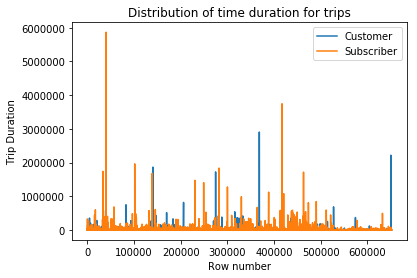

In [28]:
(df.groupby("usertype")['tripduration']).plot()
pl.legend()
pl.xlabel("Row number")
pl.ylabel("Trip Duration")
pl.title("Distribution of time duration for trips")

### Figure 1: Trip Durations grouped by the usertype.

Text(0.5,1,'Distribution of time duration for trips without outliers')

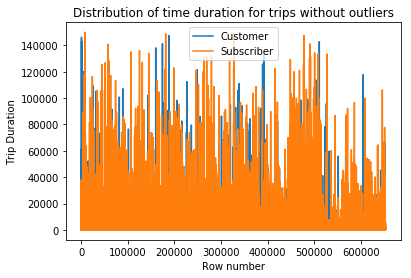

In [29]:
df[df["tripduration"] < 150000].groupby("usertype")['tripduration'].plot(y='index')
pl.legend()
pl.xlabel("Row number")
pl.ylabel("Trip Duration")
pl.title("Distribution of time duration for trips without outliers")

### Figure 2: Removing unreasonably high Trip Durations(outliers) and replotting them grouped by the usertype to get a slightly better view of the distribution

Text(0.5,1,'Average Trip Duration')

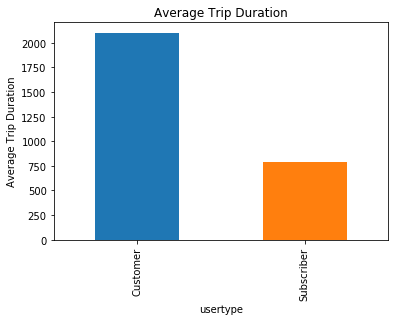

In [30]:
df.groupby("usertype")['tripduration'].mean().plot(kind='bar')
pl.ylabel("Average Trip Duration")
pl.title("Average Trip Duration")

### Figure 3: The average trip duration of customers and subscribers.